In [1]:
#read data from url
import gzip
from six.moves import urllib # type: ignore
import pandas as pd
import os
import tarfile

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing and pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [2]:
DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/"
DATA_PATH = os.path.join("datasets", "Covertype")

In [3]:
def fetch_Covertype_data(Data_url=DOWNLOAD_ROOT, Data_path=DATA_PATH):
    if not os.path.isdir(Data_path):
        os.makedirs(Data_path)

    # Download the gzipped data file directly
    gz_filename = "covtype.data.gz"
    gz_path = os.path.join(Data_path, gz_filename)
    urllib.request.urlretrieve(Data_url + gz_filename, gz_path)


    # Extract the gzipped data file
    csv_path = os.path.join(Data_path, "covtype.data")
    with gzip.open(gz_path, 'rb') as f_in:
        with open(csv_path, 'wb') as f_out:
            f_out.write(f_in.read())

In [4]:
def load_Covertype_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "covtype.data")
    #Data dont have Headers
    columns = [
                  "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                  "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                  "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                  "Horizontal_Distance_To_Fire_Points"
              ] + [f"Wilderness_Area_{i}" for i in range(1, 5)] + [f"Soil_Type_{i}" for i in range(1, 41)] + [
                  "Cover_Type"]

    return pd.read_csv(csv_path, header=None, names=columns)

In [5]:
def fetch_data(data_url, data_path, data_name):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path, data_name)
    urllib.request.urlretrieve(data_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_path)
    housing_tgz.close()

In [6]:
def load_data(data_path):
    return pd.read_csv(data_path)

In [7]:
df = load_Covertype_data()

In [8]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [10]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [11]:
# assume that the data is need to be cleaned
"""
df.dropna(subset=["colum name"])# option 1 delete the rows
df.drop("colum name", axis=1)# option 2 delete the column
median = housing["colum name"].median() # option 3 replace the missing values with median
df["colum name"].fillna(median, inplace=True)
"""

'\ndf.dropna(subset=["colum name"])# option 1 delete the rows\ndf.drop("colum name", axis=1)# option 2 delete the column\nmedian = housing["colum name"].median() # option 3 replace the missing values with median\ndf["colum name"].fillna(median, inplace=True)\n'

In [12]:
""" i can also use sklearn to fill the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#before using the imputer i need to remove the text columns
imputer.fit(numeric_data)#calculate the median
X = imputer.transform(numeric_data)#transform the data (add the median to the data)
new_df = pd.DataFrame(X, columns=numeric_data.columns)
"""

' i can also use sklearn to fill the missing values\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy="median")\n#before using the imputer i need to remove the text columns\nimputer.fit(numeric_data)#calculate the median\nX = imputer.transform(numeric_data)#transform the data (add the median to the data)\nnew_df = pd.DataFrame(X, columns=numeric_data.columns)\n'

In [13]:
"""
data_cat = df[["colum name"]]
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
print(ordinal_encoder.categories_)
output [0, 1, 2, 3, 4]
#This may be fine in some cases 
# (e.g.,for ordered categories such as “bad”, “average”, “good”, “excellent”), 
#but it is not appropriate for unordered categories (e.g., “red”, “green”, “blue”).
"""

'\ndata_cat = df[["colum name"]]\nordinal_encoder = OrdinalEncoder()\ndata_cat_encoded = ordinal_encoder.fit_transform(data_cat)\nprint(ordinal_encoder.categories_)\noutput [0, 1, 2, 3, 4]\n#This may be fine in some cases \n# (e.g.,for ordered categories such as “bad”, “average”, “good”, “excellent”), \n#but it is not appropriate for unordered categories (e.g., “red”, “green”, “blue”).\n'

In [14]:
"""
#In this case, you should use OneHotEncoder instead:
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
# output is a SciPy sparse matrix, instead of a NumPy array. This is very
#useful when you have categorical attributes with thousands of categories
#because it saves a lot of memory. (only the indices and values of the nonzero e.g. 1) 
"""

'\n#In this case, you should use OneHotEncoder instead:\ncat_encoder = OneHotEncoder()\ndata_cat_1hot = cat_encoder.fit_transform(data_cat)\n# output is a SciPy sparse matrix, instead of a NumPy array. This is very\n#useful when you have categorical attributes with thousands of categories\n#because it saves a lot of memory. (only the indices and values of the nonzero e.g. 1) \n'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [16]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [17]:
first_10_features = df.iloc[:, :10].copy()
last_feature = df[['Cover_Type']]
numerical_features = pd.concat([first_10_features, last_feature], axis=1)

In [18]:
numerical_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


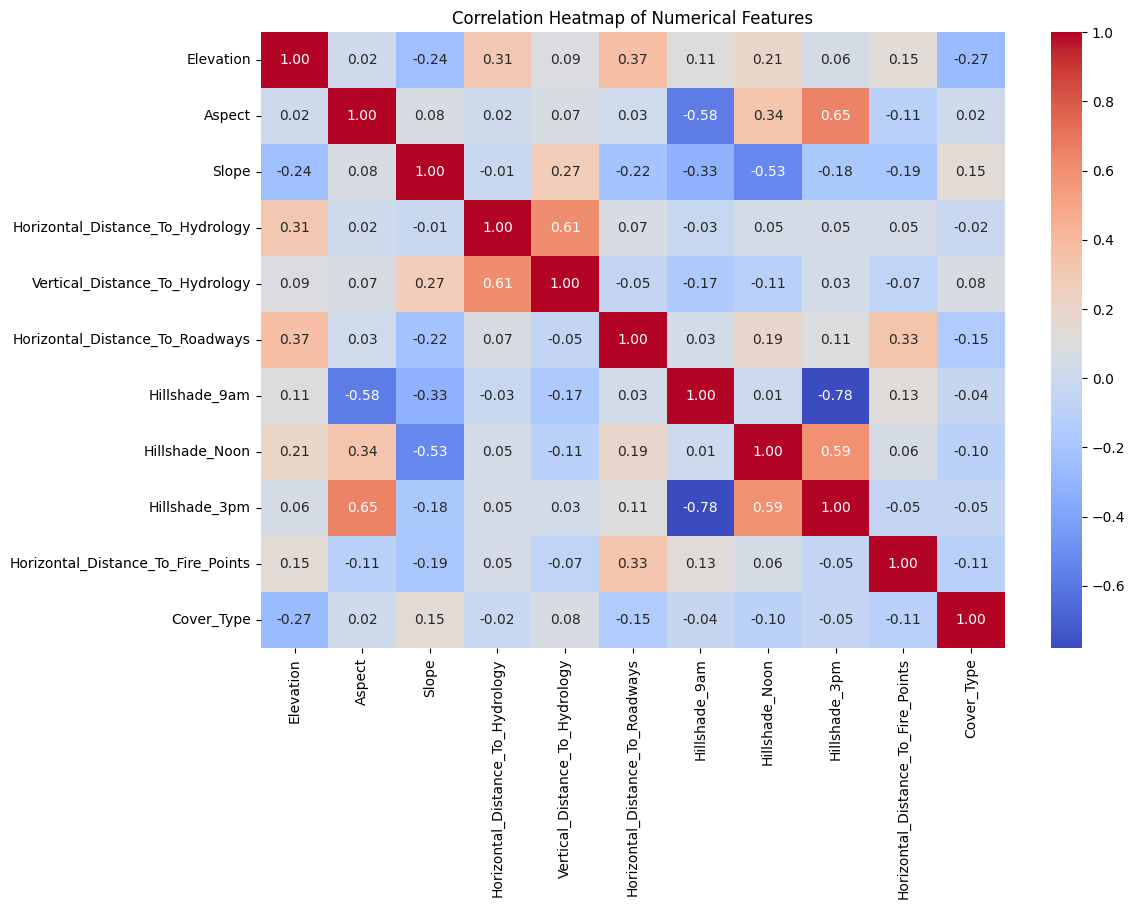

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features');

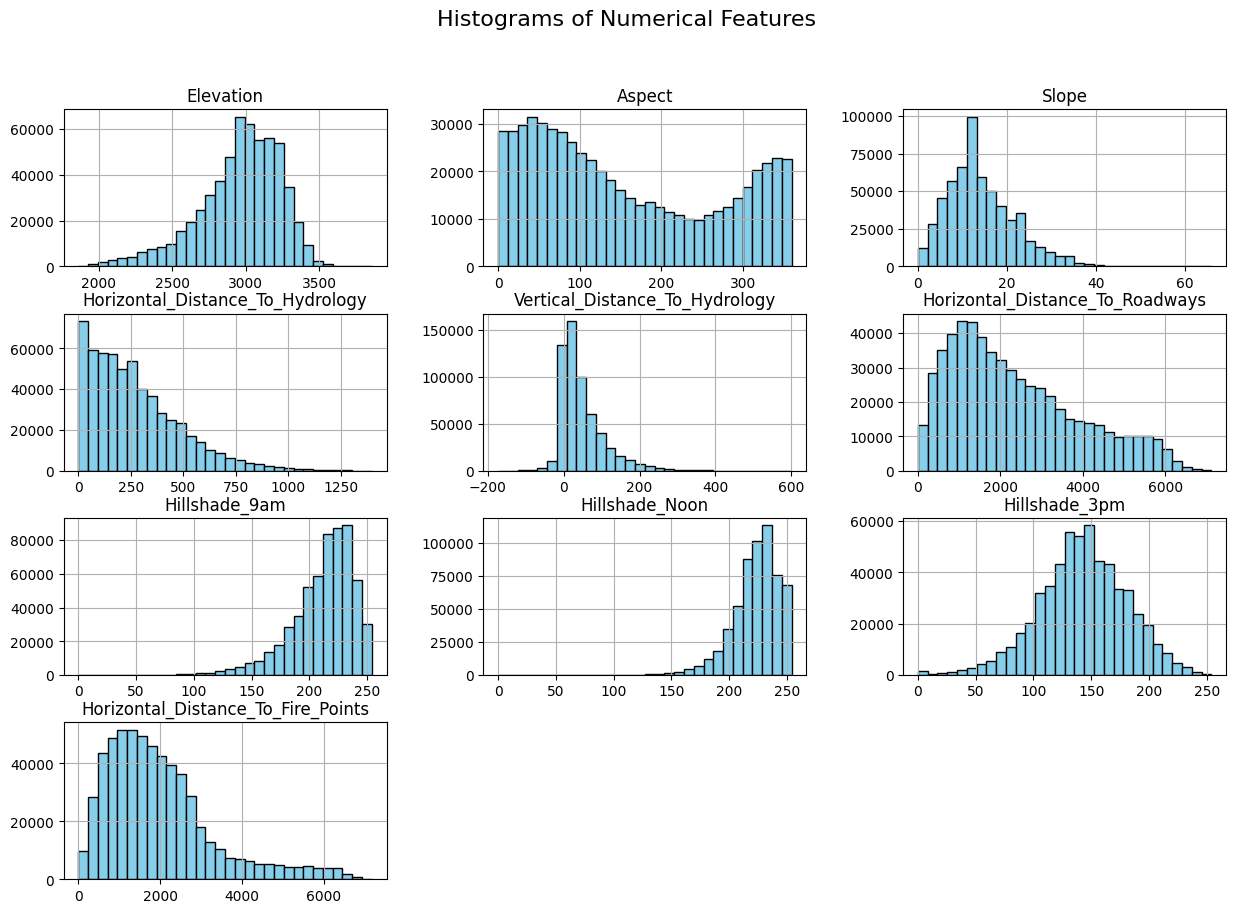

In [20]:
first_10_features.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16);

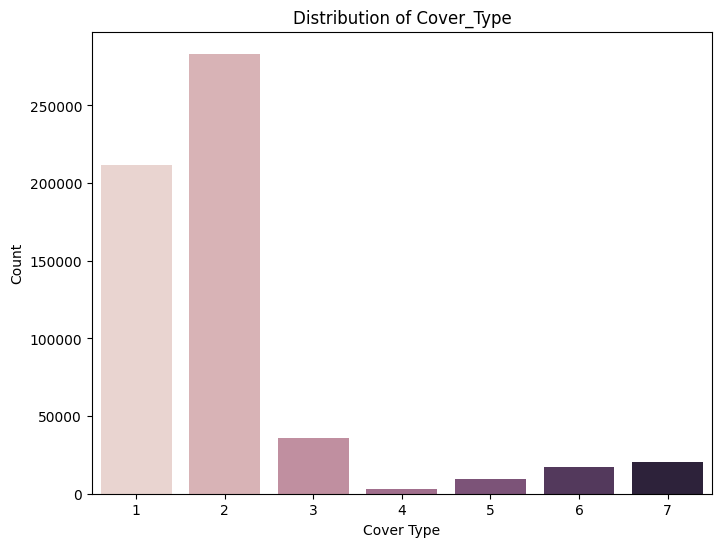

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df, hue='Cover_Type', dodge=False, legend=False,)
plt.title('Distribution of Cover_Type')
plt.xlabel('Cover Type')
plt.ylabel('Count');

In [22]:

# Calculate quartiles and IQR
q1 = np.percentile(first_10_features.iloc[:, 0], 25)
q3 = np.percentile(first_10_features.iloc[:, 0], 75)
iqr = q3 - q1

# Calculate bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound (Q1 - 1.5*IQR):", lower_bound)
print("Upper bound (Q3 + 1.5*IQR):", upper_bound)
# For all values in the first column
outliers_mask = (first_10_features.iloc[:, 0] < lower_bound) | (first_10_features.iloc[:, 0] > upper_bound)
outliers = first_10_features.iloc[:, 0][outliers_mask]

print("Outliers:")
print((outliers.shape[0]/first_10_features.shape[0])*100)


Lower bound (Q1 - 1.5*IQR): 2278.0
Upper bound (Q3 + 1.5*IQR): 3694.0
Outliers:
2.67963484403076


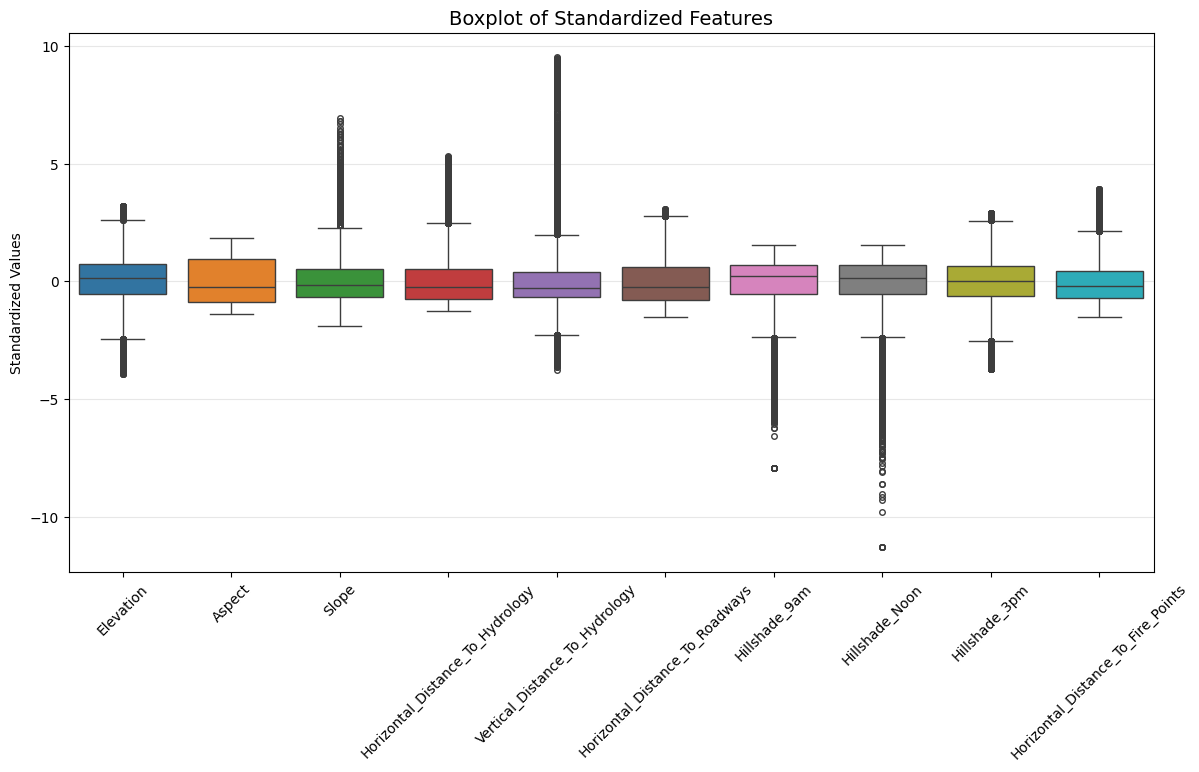

In [23]:

plt.figure(figsize=(14, 7))

# 1. Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(first_10_features)

# 2. Convert back to DataFrame (keeping column names)
scaled_df = pd.DataFrame(scaled_data, columns=first_10_features.columns)

# 3. Plot the scaled data
sns.boxplot(data=scaled_df, showfliers=True, fliersize=4)
plt.title("Boxplot of Standardized Features", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.ylabel("Standardized Values")
plt.show()

In [24]:
class1 = int((last_feature==1).sum())
class2 = int((last_feature==2).sum())
others = last_feature.shape[0]-class1-class2

for column in first_10_features.columns:
    data = first_10_features[column]
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    
    outliers_mask = (data < lower_bound) | (data > upper_bound)
    outliers = data[outliers_mask]
    
    outlier_classes = last_feature[outliers_mask]
    first_10_features = first_10_features[~outliers_mask]
    last_feature = last_feature[~outliers_mask]
    numerical_features = numerical_features[~outliers_mask]

    class_1_outliers = int((outlier_classes == 1).sum())  # Convert to int
    class_2_outliers = int((outlier_classes == 2).sum())  # Convert to int
    other_outliers = int(len(outliers) - class_1_outliers - class_2_outliers)  # Convert to int
    
    # Calculate percentages (ensure we handle division by zero)
    total_outliers = len(outliers)
    if total_outliers > 0:
        class_1_percent = float((class_1_outliers / total_outliers) * 100)
        class_2_percent = float((class_2_outliers / total_outliers) * 100)
        other_percent = float((other_outliers / total_outliers) * 100)
    else:
        class_1_percent = class_2_percent = other_percent = 0.0
    
    print(f"\nColumn: {column}")
    print(f"Total Outliers: {total_outliers} (out of {len(data)})")
    print("-" * 40)
    print(f"Outliers in Class 1: {class_1_outliers} ({class_1_percent:.1f}%) {(class_1_outliers/class1)*100 :.2f}%" )
    print(f"Outliers in Class 2: {class_2_outliers} ({class_2_percent:.1f}%) {(class_2_outliers/class2)*100 :.2f}%")
    print(f"Outliers in Other Classes: {other_outliers} ({other_percent:.1f}%) {(other_outliers/others)*100 :.2f}%")
    print("-" * 40)

C:\Users\Garen\AppData\Local\Temp\ipykernel_3196\225101286.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class1 = int((last_feature==1).sum())
C:\Users\Garen\AppData\Local\Temp\ipykernel_3196\225101286.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class2 = int((last_feature==2).sum())
C:\Users\Garen\AppData\Local\Temp\ipykernel_3196\225101286.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class_1_outliers = int((outlier_classes == 1).sum())  # Convert to int
C:\Users\Garen\AppData\Local\Temp\ipykernel_3196\225101286.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class_2_outliers = int((out


Column: Elevation
Total Outliers: 4729 (out of 581012)
----------------------------------------
Outliers in Class 1: 0 (0.0%) 0.00%
Outliers in Class 2: 0 (0.0%) 0.00%
Outliers in Other Classes: 4729 (100.0%) 5.51%
----------------------------------------

Column: Aspect
Total Outliers: 0 (out of 576283)
----------------------------------------
Outliers in Class 1: 0 (0.0%) 0.00%
Outliers in Class 2: 0 (0.0%) 0.00%
Outliers in Other Classes: 0 (0.0%) 0.00%
----------------------------------------

Column: Slope
Total Outliers: 3591 (out of 576283)
----------------------------------------
Outliers in Class 1: 796 (22.2%) 0.38%
Outliers in Class 2: 1262 (35.1%) 0.45%
Outliers in Other Classes: 1533 (42.7%) 1.79%
----------------------------------------

Column: Horizontal_Distance_To_Hydrology
Total Outliers: 5171 (out of 572692)
----------------------------------------
Outliers in Class 1: 1298 (25.1%) 0.61%
Outliers in Class 2: 2632 (50.9%) 0.93%
Outliers in Other Classes: 1241 (24.0%

In [27]:


categorical_features = df.iloc[:, 10:-1].columns  # Wilderness_Area and Soil_Type columns

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),  
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, first_10_features.columns), 
    # ("cat", OneHotEncoder(), categorical_features),  #if i want to use OneHotEncoder
    ("cat", "passthrough", categorical_features),
])



In [28]:
def split_train_test(data, test_ratio ,SEED=42):
    np.random.seed(SEED)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train,test = split_train_test(df,0.2)

In [30]:
train_prepared = full_pipeline.fit_transform(train)

In [31]:
train_prepared.shape

(464810, 54)

In [32]:
test_prepared = full_pipeline.transform(test)